# CAR PRICE PREDICTION

The primary goal is to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables.

Attributes : 

➢ car_ID: A unique identifier for each car.

➢ symboling: An insurance risk rating, ranging from -3 to 3, where higher values indicate a higher risk.

➢ CarName: The name of the car, which includes both the brand and model.

➢ fueltype: The type of fuel used by the car (e.g., gas, diesel).

➢ aspiration: Indicates whether the car has a standard (std) or turbocharged (turbo) engine.

➢ doornumber: The number of doors on the car (e.g., two, four).

➢ carbody: The body style of the car (e.g., convertible, hatchback, sedan, wagon, hardtop).

➢ drivewheel: The type of drive system the car uses (e.g., fwd for frontwheel drive, rwd for rear-wheel drive, 4wd for four-wheel drive).

➢ enginelocation: The location of the engine in the car (e.g., front, rear).

➢ wheelbase: The distance between the front and rear axles (measured in inches).

➢ carlength: The overall length of the car (measured in inches).

➢ carwidth: The overall width of the car (measured in inches).

➢ carheight: The overall height of the car (measured in inches).

➢ curbweight: The weight of the car without passengers or cargo(measured in pounds).

➢ enginetype: The type of engine (e.g., dohc, ohcv, ohc, rotor, dohcv, l,ohcf).

➢ cylindernumber: The number of cylinders in the engine (e.g., two, three, four, five, six, eight, twelve).

➢ enginesize: The size of the engine (measured in cubic inches).

➢ fuelsystem: The type of fuel system (e.g., mpfi, 2bbl, 1bbl, spdi, 4bbl, idi, spfi).

➢ boreratio: The ratio of the bore (diameter of the cylinder) to the stroke (length of the cylinder).

➢ stroke: The length of the piston stroke within the cylinder.

➢ compressionratio: The ratio of the maximum to minimum volume in the cylinder.

➢ horsepower: The power output of the engine (measured in horsepower).

➢ peakrpm: The maximum revolutions per minute (RPM) of the engine.

➢ citympg: The fuel efficiency of the car in city driving conditions (measured in miles per gallon).

➢ highwaympg: The fuel efficiency of the car in highway driving conditions (measured in miles per gallon).

➢ price: The price of the car (measured in USD), which is the target variable for prediction.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## DATA CLEANING

### Check for duplicated values

In [8]:
car_data.duplicated().sum()

0

### Check for NULL Values

In [9]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

## EDA and Visualization

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

Text(0, 0.5, 'Frequency')

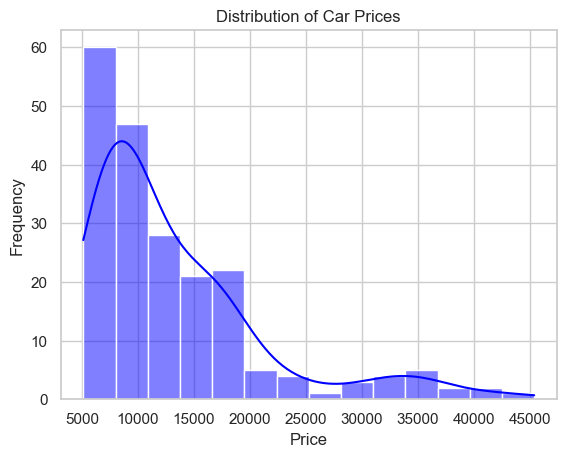

In [12]:
sns.histplot(car_data['price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Horsepower')

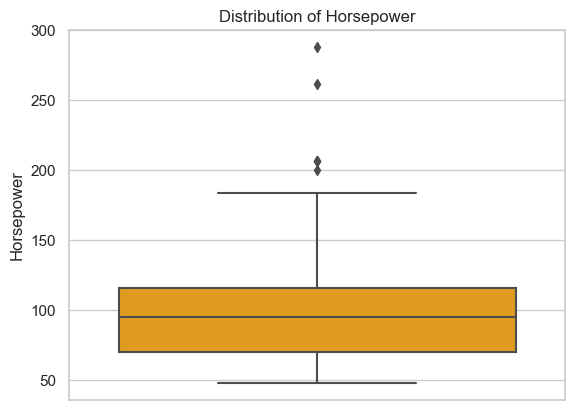

In [13]:
sns.boxplot(y=car_data['horsepower'], color='orange')
plt.title('Distribution of Horsepower')
plt.ylabel('Horsepower')

#### Horsepwer are in range 50 to 180.

Text(0, 0.5, 'Engine Size')

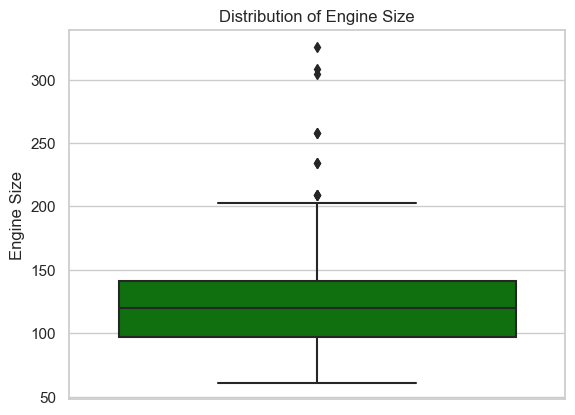

In [14]:
sns.boxplot(y=car_data['enginesize'], color='green')
plt.title('Distribution of Engine Size')
plt.ylabel('Engine Size')

#### Engine size are in range 55 to 205.

Text(0, 0.5, 'Curb Weight')

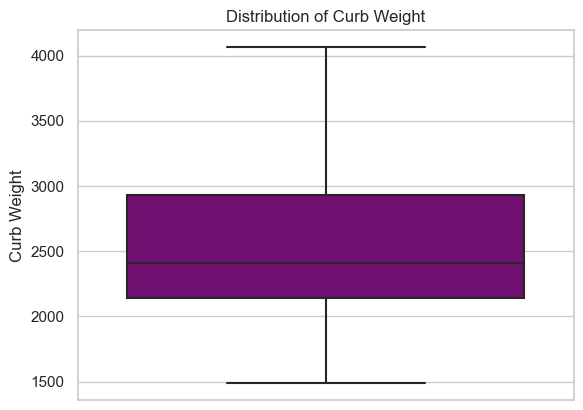

In [15]:
sns.boxplot(y=car_data['curbweight'], color='purple')
plt.title('Distribution of Curb Weight')
plt.ylabel('Curb Weight')

#### Curb weight of cars are in range 1500 to 4000.

Text(0, 0.5, 'Count')

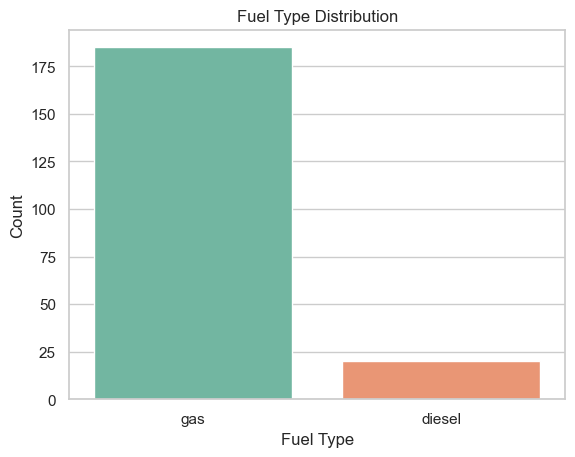

In [16]:
sns.countplot(x='fueltype', data=car_data, palette='Set2')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

#### Most of cars are of fuel type gas.

Text(0, 0.5, 'Count')

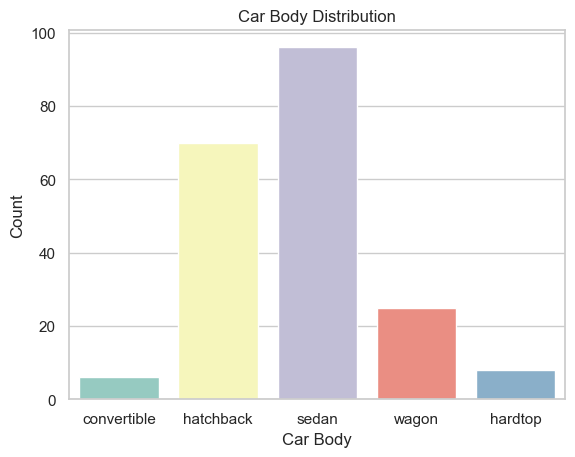

In [17]:
sns.countplot(x='carbody', data=car_data, palette='Set3')
plt.title('Car Body Distribution')
plt.xlabel('Car Body')
plt.ylabel('Count')

#### Most car bodies are sedan and hatchback.

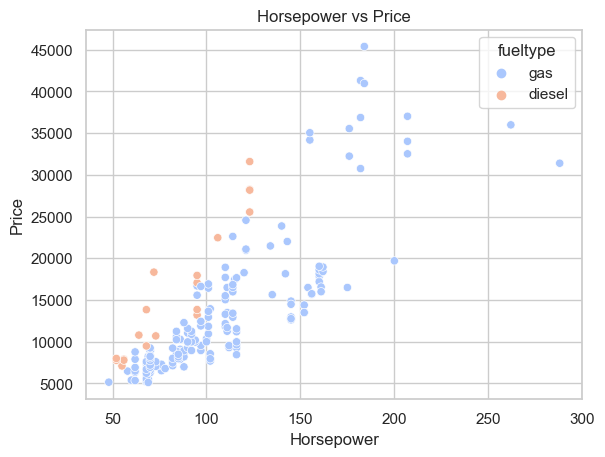

In [18]:
sns.scatterplot(x='horsepower', y='price', data=car_data, hue='fueltype', palette='coolwarm')
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

#### Price of cars increases as increase in horsepower.

C:\Users\ANKIT KUMAR RAI\AppData\Local\Temp\ipykernel_4996\1500303115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(),annot=True);


Text(0.5, 1.0, 'Correlation map')

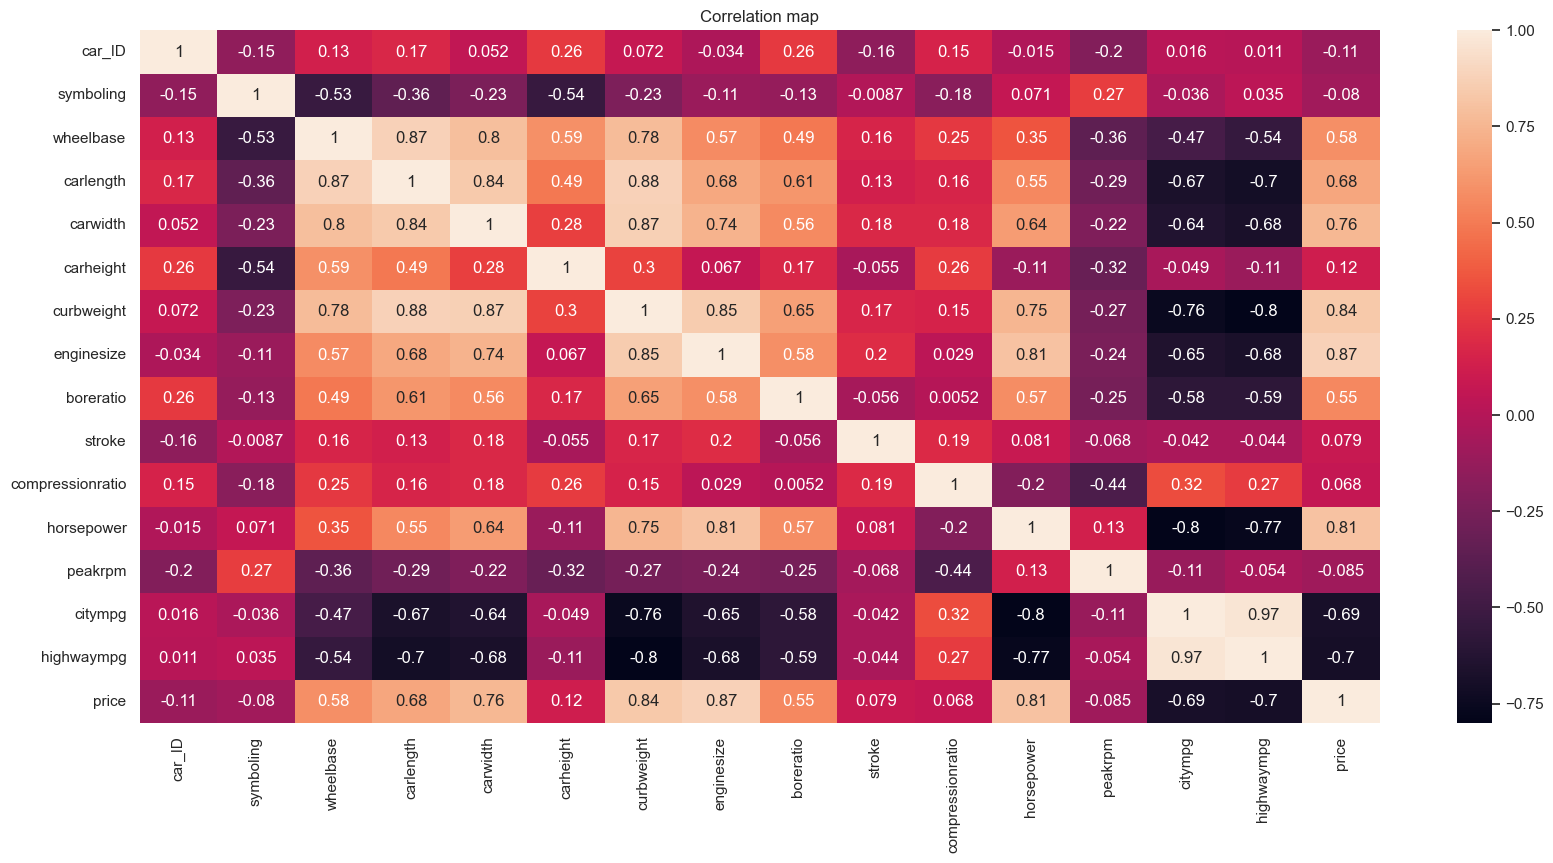

In [48]:
plt.figure(figsize=(20,9));
sns.heatmap(car_data.corr(),annot=True);
plt.title("Correlation map")

#### From above heatmap we can observe that attributes like "enginesize" , "horsepower" , "curbweight" are highly related to our output(price)

## CONCLUSION(Visualization) : 

1. Most of cars are of gas fueltype.
2. Horsepwer are in range 50 to 180.
3. Engine size are in range 55 to 205.
4. Curb weight of cars are in range 1500 to 4000.
5. Most car bodies are sedan and hatchback.
6. Price of cars increases as increase in horsepower.
7. From above heatmap we can observe that attributes like "enginesize" , "horsepower" , "curbweight" are highly related to our output(price)

## FEATURES SCALING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
X = car_data.drop(columns=['price', 'car_ID', 'CarName'])
y = car_data['price']

In [22]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## MODELING

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print("mean absolute error : ",mae)
    print("mean squared error : ",rmse)
    print("r2 score : ",r2)

In [28]:
lr_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
evaluate_model(lr_model, X_train, X_test, y_train, y_test, 'Linear Regression')

mean absolute error :  2118.3750035831918
mean squared error :  3288.4854793019513
r2 score :  0.8603119935383343


In [29]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=0))])
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

mean absolute error :  1841.3770574099883
mean squared error :  2713.4636939248358
r2 score :  0.9048923846673809


In [30]:
dt_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state=0))])
evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree Regressor')

mean absolute error :  2077.939024390244
mean squared error :  3262.343597783655
r2 score :  0.8625240712117413


In [31]:
svr_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', SVR())])
evaluate_model(svr_model, X_train, X_test, y_train, y_test, 'Support Vector Regressor')

mean absolute error :  5665.1747892039975
mean squared error :  9188.281871966508
r2 score :  -0.09052564209240344


## CONCLUSION :

### 1. After analysing all models , Random Forest Regressor model have less mean absolute error, mean squared              error and high r2 score would be best model for our prediction.
### 2. So we use Random Forest Regressor for our Feature Selection Process.

## FEATURE SELECTION

In [32]:
from sklearn.feature_selection import RFE

In [33]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [34]:
num_feature_names = numerical_features
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

In [35]:
transformed_feature_names = np.concatenate([num_feature_names, cat_feature_names])

In [36]:
rf = RandomForestRegressor(random_state=0)
rfe = RFE(estimator=rf, n_features_to_select=8)
rfe.fit(X_train_transformed, y_train)

RFE(estimator=RandomForestRegressor(random_state=0), n_features_to_select=8)

In [37]:
selected_features = transformed_feature_names[rfe.support_]

In [38]:
print("Selected Features by RFE with Random Forest:", selected_features)

Selected Features by RFE with Random Forest: ['wheelbase' 'carlength' 'carwidth' 'curbweight' 'enginesize' 'horsepower'
 'peakrpm' 'highwaympg']


In [39]:
ranking = rfe.ranking_

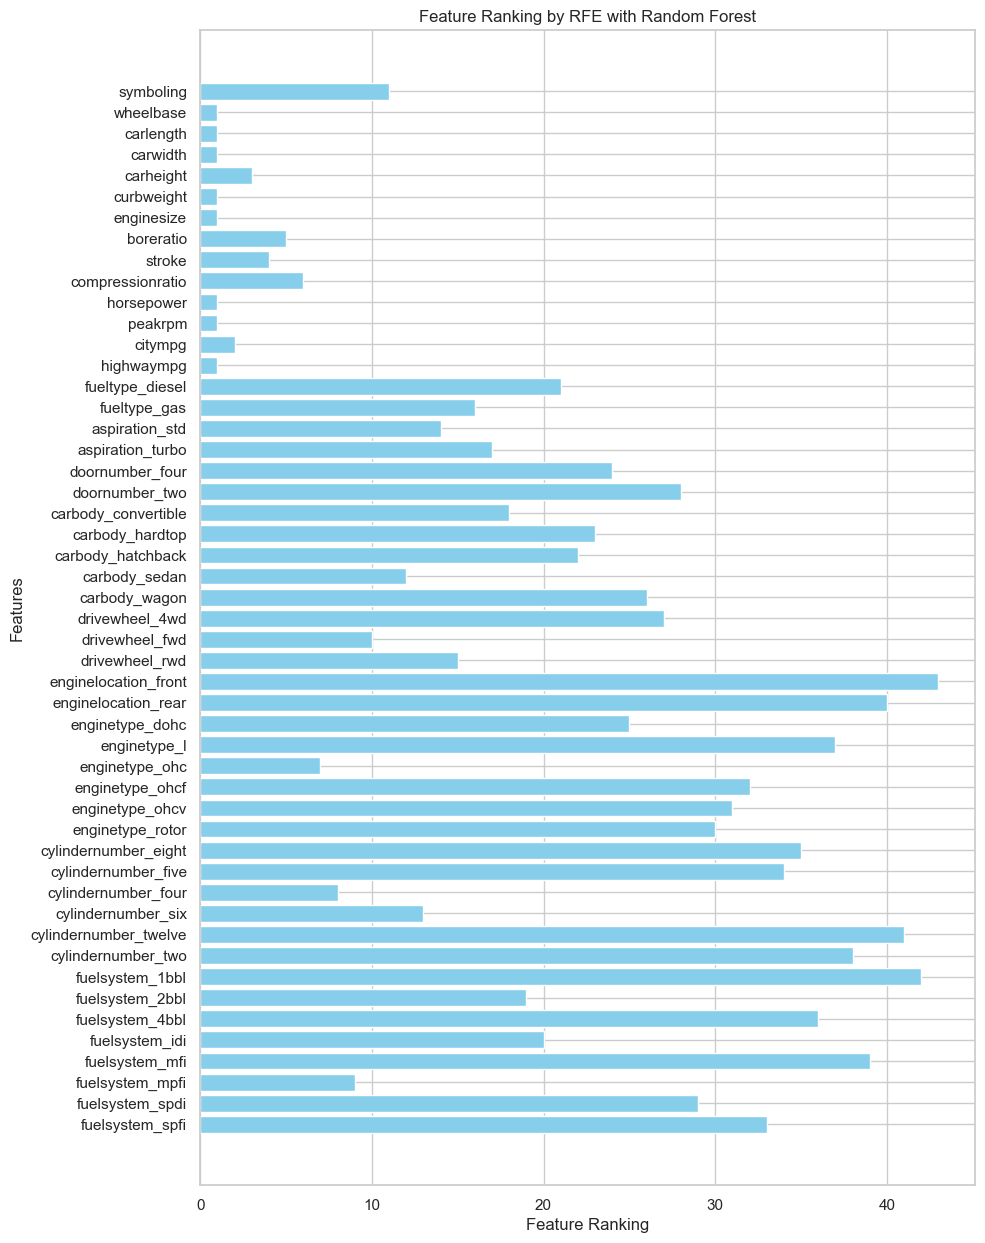

In [40]:
plt.figure(figsize=(10, 15))
plt.barh(range(len(ranking)), ranking, align='center', color='skyblue')
plt.yticks(np.arange(len(transformed_feature_names)), transformed_feature_names)
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking by RFE with Random Forest')
plt.gca().invert_yaxis() 
plt.show()

In [41]:
X_train_selected = rfe.transform(X_train_transformed)
X_test_selected = rfe.transform(X_test_transformed)

In [42]:
rf_selected = RandomForestRegressor(random_state=0)
rf_selected.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=0)

In [43]:
y_pred_selected = rf_selected.predict(X_test_selected)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_selected = mean_absolute_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))
r2_selected = r2_score(y_test, y_pred_selected)

In [45]:
print(f'MAE: {mae_selected}')
print(f'RMSE: {rmse_selected}')
print(f'R²: {r2_selected}')

MAE: 1919.9355699999996
RMSE: 2812.894442781983
R²: 0.8977945316992978
